**Imports**

Pandas, Numpy, Tensorflow, MatplotLib


In [132]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

# Uploading Images Manually
The below code will make a upload image widget for uploading files from the system and Can be accessed from the system directly..
(Recommended : To upload .zip file for faster upload of data)

In [141]:
# from google.colab import files
# files.upload()  # Upload catsvsdogs.zip(DataSet of 2K images)


**Unzipping the file**

In [3]:
# Clean up any old extract(Session resatrts often)
!rm -rf MiniPetImages

# Re-extract
!unzip -q CatsVsDogs.zip


replace MiniPetImages/Cats/0.jpg? [y]es, [n]o, [A]ll, [N]one, [r]ename: 

In [4]:
!ls
# if these two files are seen as output then we are on right path

CatsVsDogs.zip	MiniPetImages  sample_data


Uploaded MiniPetImages dataset for the initial models like for Logistic Regression and Decision Trees

When we will work with Neural Networks will go with dataset which consists of Images more than 25K

In [65]:
import os

data_dir = "/content/MiniPetImages"  # confirmed from unzip

print("Cats:", len(os.listdir(os.path.join(data_dir, "Cats"))))
print("Dogs:", len(os.listdir(os.path.join(data_dir, "Dogs"))))

Cats: 1014
Dogs: 1015


# Logistic Regression
**Using MiniPetImages of DataSet of 2K images in total**

In [66]:
from PIL import Image

X_all = []                                      # Input Features (Flattended form)
Y_all = []                                      # Output Labels (0 -> Cats, 1 -> Dogs)

img_size= (64,64)                               #For resizing the image

for label,folder in enumerate(["Cats", "Dogs"]) :
  folder_path = os.path.join(data_dir, folder)

  for filename in os.listdir(folder_path) :
    try :
      img_path = os.path.join(folder_path, filename)
      img = Image.open(img_path).convert("L")    # Covert to Grayscale
      img = img.resize(img_size)
      img_array = np.array(img).flatten()/255.0  # Normalize and Flatten
      X_all.append(img_array)
      Y_all.append(label)
    except Exception as e :
      pass                                       # Ignoring corrupt files in the folder


In [67]:
print("Total images processed:", len(X_all))
print("Shape of one image vector:", len(X_all[0]))


Total images processed: 2029
Shape of one image vector: 4096


## 3. Train-Test Split (80% Train, 20% Test)


In [68]:
X_all = np.array(X_all)
Y_all = np.array(Y_all)

from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(X_all, Y_all, test_size= 0.2, stratify= Y_all)

print("Shape of X_train:", X_train.shape)
print("Shape of Y_train:", Y_train.shape)
print("Shape of X_test:", X_test.shape)
print("Shape of Y_test:", Y_test.shape)




Shape of X_train: (1623, 4096)
Shape of Y_train: (1623,)
Shape of X_test: (406, 4096)
Shape of Y_test: (406,)


In [127]:
# Compare with above output to related with use of func shape()
print("Training set size:", X_train.shape[0])
print("Test set size:", X_test.shape[0])
print("Feature dimension:", X_train.shape[1])

Training set size: 1623
Test set size: 406
Feature dimension: 4096


#  Logistic Regression - Training and Evaluation

In [70]:
from sklearn.linear_model import LogisticRegression

log_reg_model = LogisticRegression(max_iter = 10000)
log_reg_model.fit(X_train,Y_train)

LogisticRegression(max_iter=10000)

In [71]:
Y_pred = log_reg_model.predict(X_test)

In [72]:
from sklearn.metrics import accuracy_score,confusion_matrix

accuracy = accuracy_score(Y_test, Y_pred)

In [73]:
print("Accuracy:", accuracy)

Accuracy: 0.5221674876847291


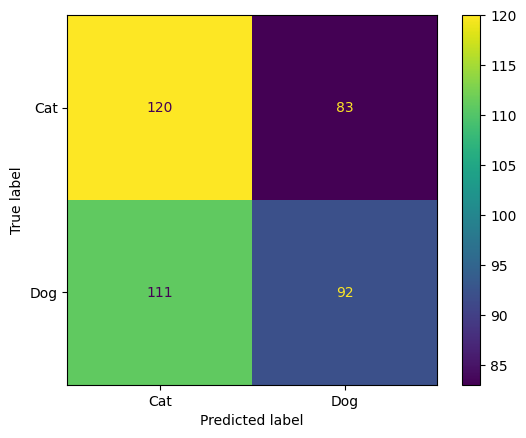

In [122]:
from sklearn.metrics import confusion_matrix, classification_report, ConfusionMatrixDisplay

# Confusion Matrix
cm_lr = confusion_matrix(Y_test, Y_pred)
display = ConfusionMatrixDisplay(confusion_matrix=cm_lr, display_labels=["Cat", "Dog"])
display.plot()



In [128]:
y_pred = log_reg_model.predict(X_test)
print(classification_report(Y_test, y_pred, target_names=["Cat", "Dog"]))

              precision    recall  f1-score   support

         Cat       0.52      0.59      0.55       203
         Dog       0.53      0.45      0.49       203

    accuracy                           0.52       406
   macro avg       0.52      0.52      0.52       406
weighted avg       0.52      0.52      0.52       406



# Decision Tree

In [76]:
from sklearn.tree import DecisionTreeClassifier

dt_model = DecisionTreeClassifier()
dt_model.fit(X_train,Y_train)

DecisionTreeClassifier()

In [77]:
Y_pred_dt = dt_model.predict(X_test)

In [78]:
from sklearn.metrics import accuracy_score

accuracy = accuracy_score(Y_test, Y_pred_dt)
print("Accuracy : ",accuracy)

Accuracy :  0.541871921182266


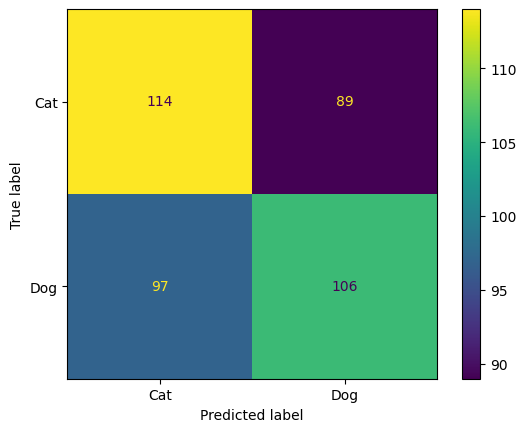

In [129]:

# Confusion Matrix
cm_dt = confusion_matrix(Y_test, Y_pred_dt)
disp = ConfusionMatrixDisplay(confusion_matrix=cm_dt, display_labels=["Cat", "Dog"])
disp.plot()

In [140]:
# Classification Report
print(" Classification Report for Decision Tree:\n")
print(classification_report(Y_test, Y_pred_dt, target_names=["Cat", "Dog"]))

 Classification Report for Decision Tree:

              precision    recall  f1-score   support

         Cat       0.54      0.56      0.55       203
         Dog       0.54      0.52      0.53       203

    accuracy                           0.54       406
   macro avg       0.54      0.54      0.54       406
weighted avg       0.54      0.54      0.54       406



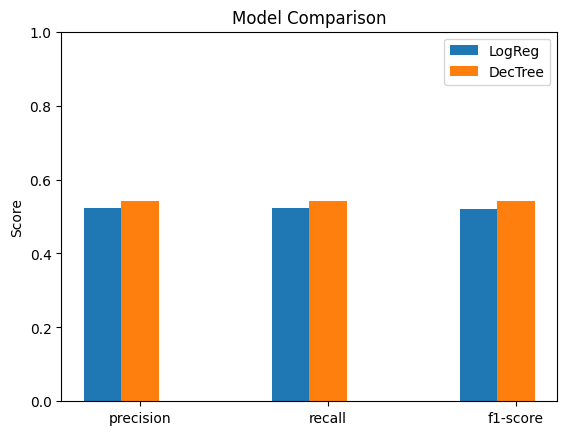

In [125]:
# Storing Model reports
lr_report = classification_report(Y_test, Y_pred, output_dict=True)
dt_report = classification_report(Y_test, Y_pred_dt, output_dict=True)

# Extract metrics as per use
metrics = ["precision", "recall", "f1-score"]
lr_scores = [lr_report["macro avg"][m] for m in metrics]
dt_scores = [dt_report["macro avg"][m] for m in metrics]

# Plot comparison
x = np.arange(len(metrics))

plt.bar(x, lr_scores, width=0.2, label="LogReg")
plt.bar(x + 0.2, dt_scores, width=0.2, label="DecTree")

plt.xticks(x + 0.2, metrics)
plt.ylabel("Score")
plt.ylim(0, 1)
plt.title("Model Comparison")
plt.legend()
plt.show()

# Using TENSORFLOW WITH CNNs

In [130]:
data_dir = "/content/MiniPetImages" # Stored dataeset path
img_size = (64,64)
batch_size = 32

train_ds = tf.keras.utils.image_dataset_from_directory(
    directory = data_dir,
    validation_split= 0.2,
    subset= "training",
    seed= 123,
    image_size= img_size,
    batch_size= batch_size,
    color_mode= 'rgb'
) # can add more parameters Like shufffle,labels,etc

val_ds = tf.keras.utils.image_dataset_from_directory(
    directory = data_dir,
    validation_split= 0.2,
    subset = "validation",
    seed= 123,
    image_size= img_size,
    batch_size= batch_size,
    color_mode= 'rgb'
)

Found 2029 files belonging to 2 classes.
Using 1624 files for training.
Found 2029 files belonging to 2 classes.
Using 405 files for validation.


## Visualization of Dataset

['Cats', 'Dogs']


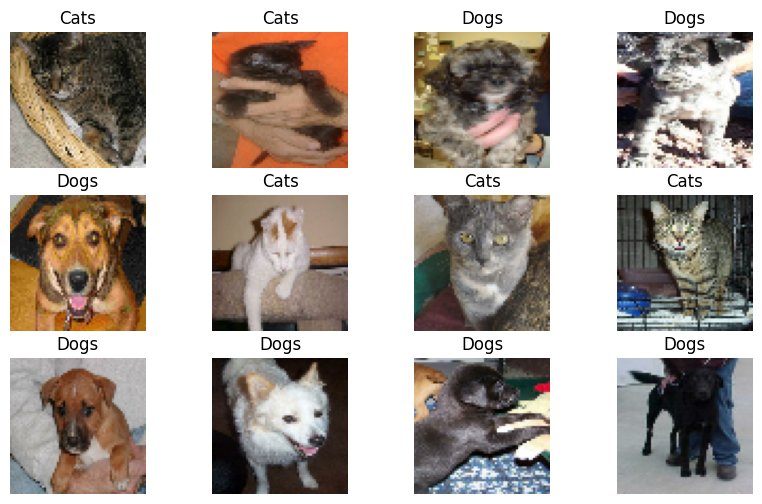

In [131]:
class_names = train_ds.class_names
print(class_names)
plt.figure(figsize=(10,6))
for images, labels in train_ds.take(1):
  # No.of images You want to see from the dataset(per batch)
  for i in range(12):
        ax = plt.subplot(3, 4, i + 1)
        plt.imshow(images[i].numpy().astype("uint8"), cmap="gray")
        plt.title(class_names[labels[i]])
        plt.axis("off")

**CNN model**

In [144]:
from tensorflow.keras import layers, models

model = models.Sequential([
    layers.Input(shape=(64, 64, 3)),
    layers.Rescaling(1./255),  # Normalize pixel values

    layers.Conv2D(32, (3,3), activation='relu'),
    layers.MaxPooling2D(),

    layers.Conv2D(64, (3,3), activation='relu'),
    layers.MaxPooling2D(),

    layers.Conv2D(128, (3,3), activation='relu'),
    layers.MaxPooling2D(),

    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(1, activation='sigmoid')  # Binary classification
])

model.summary()


Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ rescaling_3 (Rescaling)         │ (None, 64, 64, 3)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_9 (Conv2D)               │ (None, 62, 62, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_9 (MaxPooling2D)  │ (None, 31, 31, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_10 (Conv2D)              │ (None, 29, 29, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_10 (MaxPooling2D) │ (None, 14, 14, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_11 (Conv2D)              │ (None, 12, 12, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_11 (MaxPooling2D) │ (None, 6, 6, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_3 (Flatten)             │ (None, 4608)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 64)             │       294,976 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 1)              │            65 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 388,289 (1.48 MB)

 Trainable params: 388,289 (1.48 MB)

 Non-trainable params: 0 (0.00 B)

In [134]:
model.compile(
    optimizer='adam',
    loss='binary_crossentropy',
    metrics=['accuracy']
)
# Can be increased accordingly for better results
EPOCHS = 10

history = model.fit(
    train_ds,
    validation_data=val_ds,
    epochs=EPOCHS
)


Epoch 1/10
51/51 ━━━━━━━━━━━━━━━━━━━━ 17s 282ms/step - accuracy: 0.4858 - loss: 0.6980 - val_accuracy: 0.4889 - val_loss: 0.6854
Epoch 2/10
51/51 ━━━━━━━━━━━━━━━━━━━━ 14s 277ms/step - accuracy: 0.5894 - loss: 0.6706 - val_accuracy: 0.6370 - val_loss: 0.6482
Epoch 3/10
51/51 ━━━━━━━━━━━━━━━━━━━━ 20s 275ms/step - accuracy: 0.6695 - loss: 0.6158 - val_accuracy: 0.6765 - val_loss: 0.5901
Epoch 4/10
51/51 ━━━━━━━━━━━━━━━━━━━━ 21s 282ms/step - accuracy: 0.7191 - loss: 0.5657 - val_accuracy: 0.7160 - val_loss: 0.5984
Epoch 5/10
51/51 ━━━━━━━━━━━━━━━━━━━━ 20s 278ms/step - accuracy: 0.7480 - loss: 0.5239 - val_accuracy: 0.7333 - val_loss: 0.5550
Epoch 6/10
51/51 ━━━━━━━━━━━━━━━━━━━━ 20s 270ms/step - accuracy: 0.7802 - loss: 0.4881 - val_accuracy: 0.7012 - val_loss: 0.5900
Epoch 7/10
51/51 ━━━━━━━━━━━━━━━━━━━━ 14s 278ms/step - accuracy: 0.7687 - loss: 0.4785 - val_accuracy: 0.7062 - val_loss: 0.5877
Epoch 8/10
51/51 ━━━━━━━━━━━━━━━━━━━━ 20s 277ms/step - accuracy: 0.8147 - loss: 0.4067 - val_accu

In [135]:
model.evaluate(val_ds)


13/13 ━━━━━━━━━━━━━━━━━━━━ 1s 72ms/step - accuracy: 0.7132 - loss: 0.6849


[0.6448825597763062, 0.7308642268180847]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 177ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 89ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 80ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 82ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 84ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 96ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 82ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 81ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 82ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 86ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 84ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 109ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 225ms/step
Classification Report for CNN:

              precision    recall  f1-score   support

        Cats       0.70      0.83      0.76       208
        Dogs       0.78      0.62      0.69       197

    accuracy                           0.73       405
   macro avg       0.74      0.73      0.73       405
weighted avg       0.74      0.73      0.73       405



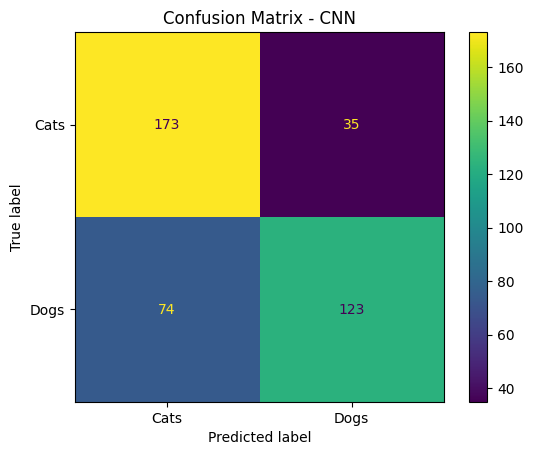

In [136]:

y_true = []
y_pred = []

for images, labels in val_ds:
    preds = model.predict(images)
    preds = tf.round(preds).numpy().astype(int).flatten()
    y_pred.extend(preds)
    y_true.extend(labels.numpy())

# 1. Classification Report
print("Classification Report for CNN:\n")
print(classification_report(y_true, y_pred, target_names=class_names))

# 2. Confusion Matrix
cm = confusion_matrix(y_true, y_pred)
disp_cnn = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=class_names)
disp_cnn.plot()
plt.title("Confusion Matrix - CNN")
plt.show()


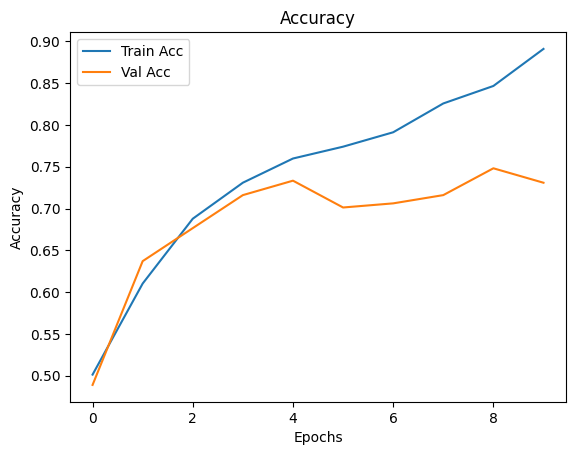

In [137]:
# Accuracy plot
plt.plot(history.history['accuracy'], label='Train Acc')
plt.plot(history.history['val_accuracy'], label='Val Acc')
plt.title('Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()


# Comparisons between all three models


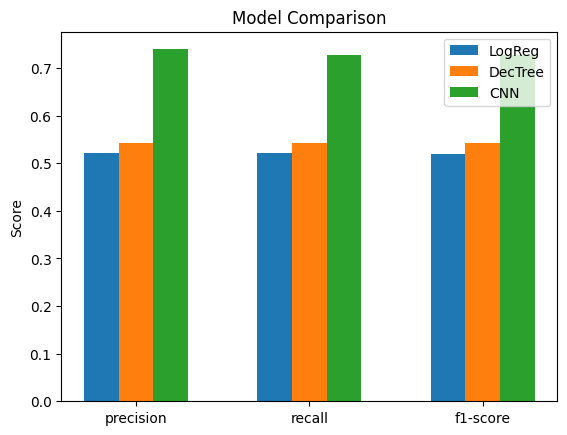

In [139]:
# Stored previous models data
report_lr = classification_report(Y_test, Y_pred, output_dict=True)
report_dt = classification_report(Y_test, Y_pred_dt, output_dict=True)
report_cnn = classification_report(y_true, y_pred, output_dict=True)

# Chosing reqd metrics for predictions
metrics = ["precision", "recall", "f1-score"]

lr_scores = [report_lr["macro avg"][m] for m in metrics]
dt_scores = [report_dt["macro avg"][m] for m in metrics]
cnn_scores = [report_cnn["macro avg"][m] for m in metrics]

# Plotting
x = np.arange(len(metrics))

plt.bar(x, lr_scores, width=0.2, label="LogReg")
plt.bar(x + 0.2, dt_scores, width=0.2, label="DecTree")
plt.bar(x + 0.4, cnn_scores, width=0.2, label="CNN")

plt.xticks(x + 0.2, metrics)
plt.ylabel("Score")
plt.title("Model Comparison")
plt.legend()
plt.show()